# Analysing the trends of Covid 19

## Problem Statement
Given data about COVID-19 patients, write code to visualize the impact and
analyze the trend of rate of infection and recovery as well as make predictions
about the number of cases expected a week in future based on the current
trends.

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
import warnings
warnings.filterwarnings('ignore')

In [46]:
df = pd.read_csv('covid_19_clean_complete.csv')
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [47]:
df.shape

(49068, 10)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [49]:
df.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [50]:
# too much NAN values so dropping the column
data = df.drop(columns=['Province/State'])

In [51]:
# Convert 'Date' to datetime
data['Date'] = pd.to_datetime(data['Date'])

### Aggregating Data for India

In [52]:
# Global aggregation
global_data = data.groupby('Date')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()

# India-specific data
india_data = data[data['Country/Region'] == 'India']
india_data = india_data.groupby('Date')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()

india_data

In [53]:
global_data

,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,555,17,28,510
1,2020-01-23,654,18,30,606
2,2020-01-24,941,26,36,879
3,2020-01-25,1434,42,39,1353
4,2020-01-26,2118,56,52,2010
...,...,...,...,...,...
183,2020-07-23,15510481,633506,8710969,6166006
184,2020-07-24,15791645,639650,8939705,6212290
185,2020-07-25,16047190,644517,9158743,6243930
186,2020-07-26,16251796,648621,9293464,6309711


### Visualizing global data

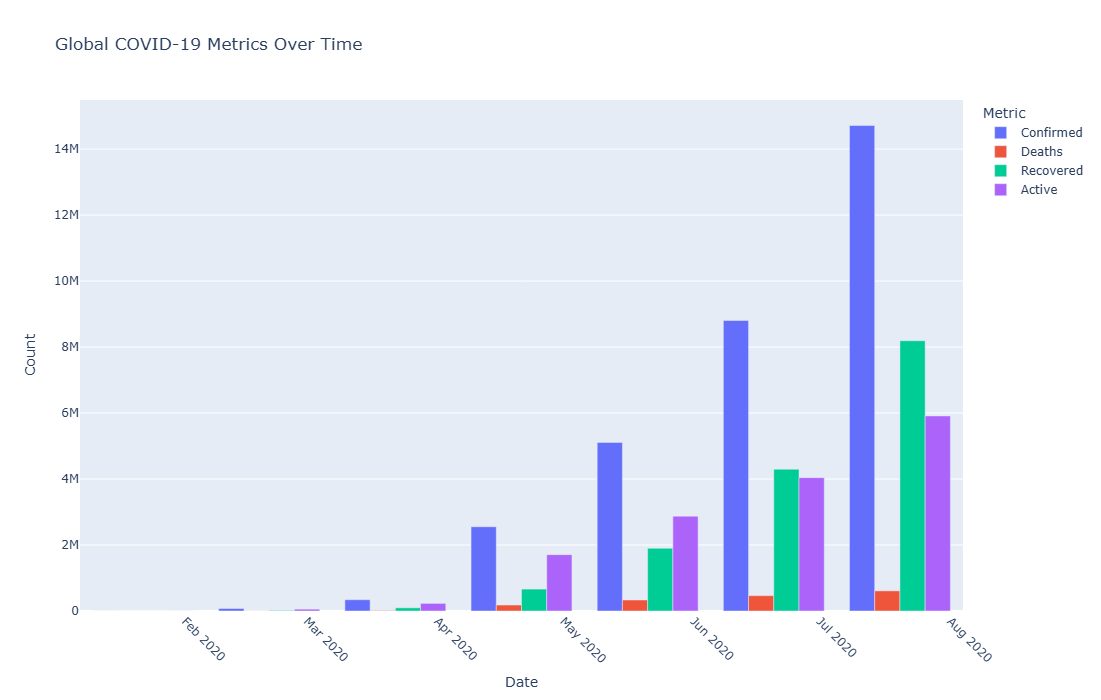

In [54]:
import plotly.express as px

# Subset the global data for selected dates (every 30 days)
selected_dates = global_data['Date'][::30]
global_filtered = global_data[global_data['Date'].isin(selected_dates)]

global_melted_filtered = global_filtered.melt(
    id_vars='Date', value_vars=['Confirmed', 'Deaths', 'Recovered', 'Active'],
    var_name='Metric', value_name='Count'
)

fig_global = px.bar(
    global_melted_filtered,
    x='Date',
    y='Count',
    color='Metric',
    barmode='group',
    title='Global COVID-19 Metrics Over Time',
    labels={'Date': 'Date', 'Count': 'Count'},
    template='plotly'
)

fig_global.update_layout(
    xaxis_title='Date',
    yaxis_title='Count',
    legend_title='Metric',
    xaxis_tickangle=45,
    width=1000,  # Set width
    height=700,  # Set height
)

fig_global.show()


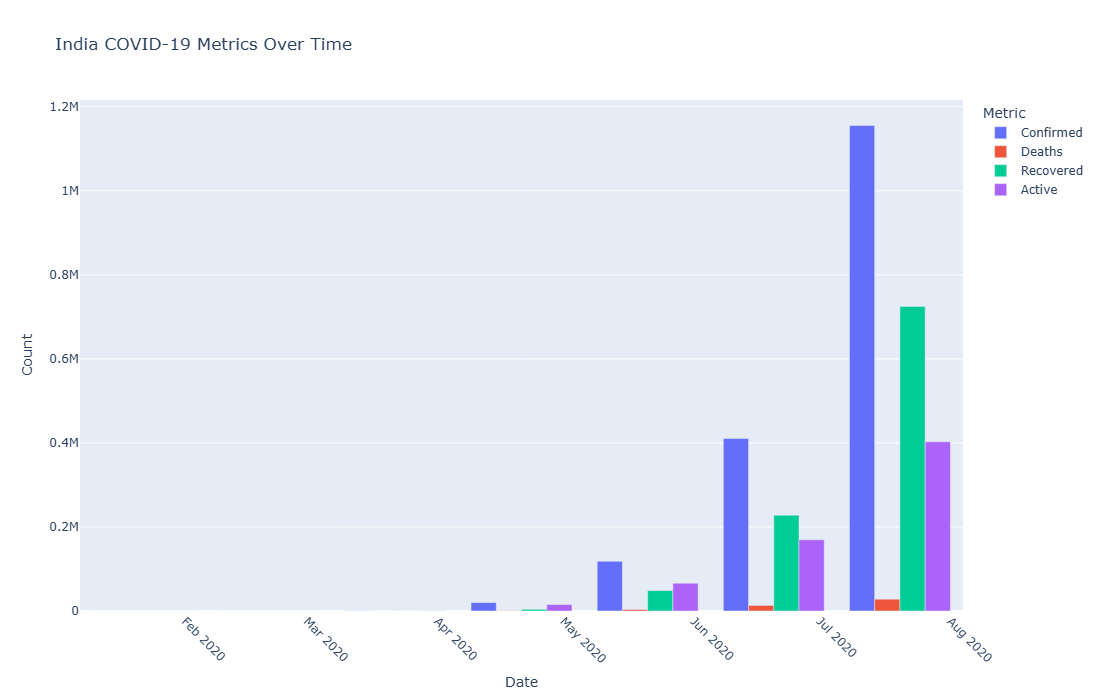

In [55]:
# Subset the India data for selected dates (every 30 days)
selected_dates_india = india_data['Date'][::30]
india_filtered = india_data[india_data['Date'].isin(selected_dates_india)]

india_melted_filtered = india_filtered.melt(
    id_vars='Date', value_vars=['Confirmed', 'Deaths', 'Recovered', 'Active'],
    var_name='Metric', value_name='Count'
)

fig_india = px.bar(
    india_melted_filtered,
    x='Date',
    y='Count',
    color='Metric',
    barmode='group',
    title='India COVID-19 Metrics Over Time',
    labels={'Date': 'Date', 'Count': 'Count'},
    template='plotly'
)

fig_india.update_layout(
    xaxis_title='Date',
    yaxis_title='Count',
    legend_title='Metric',
    xaxis_tickangle=45,
    width=1000,  
    height=700,  
)

fig_india.show()


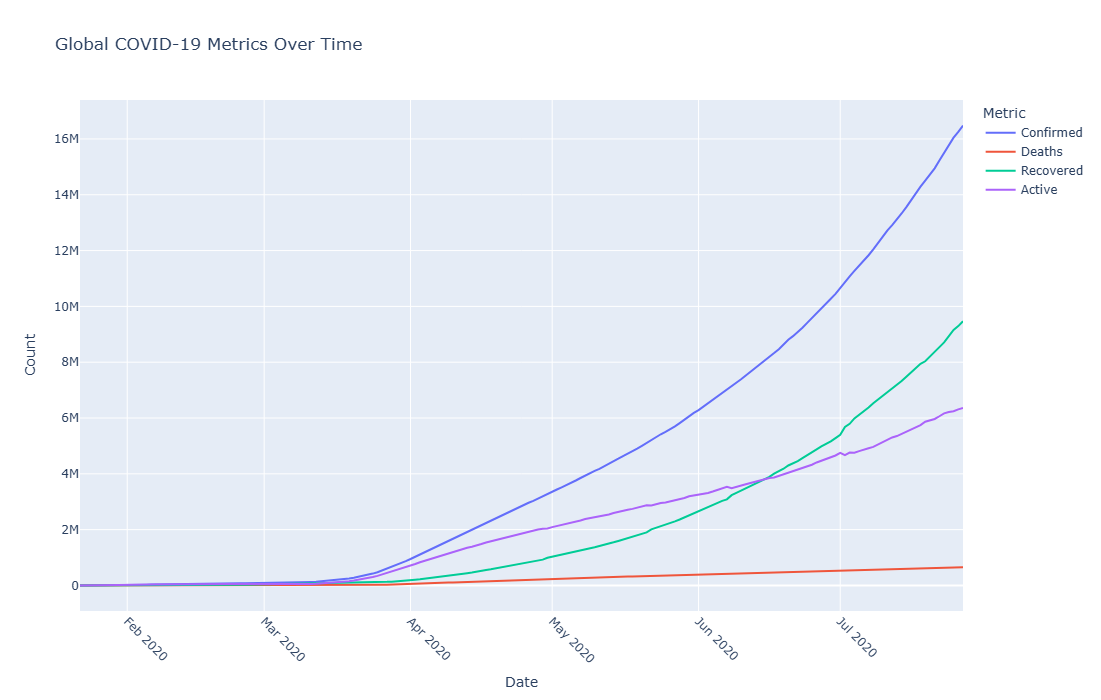

In [56]:
fig_global_line = px.line(
    global_data,
    x='Date',
    y=['Confirmed', 'Deaths', 'Recovered', 'Active'],
    labels={'value': 'Count', 'Date': 'Date', 'variable': 'Metric'},
    title='Global COVID-19 Metrics Over Time'
)

# Customize the layout
fig_global_line.update_layout(
    xaxis_title='Date',
    yaxis_title='Count',
    legend_title='Metric',
    xaxis_tickangle=45,
    width=1000,  
    height=700,
)

fig_global_line.show()


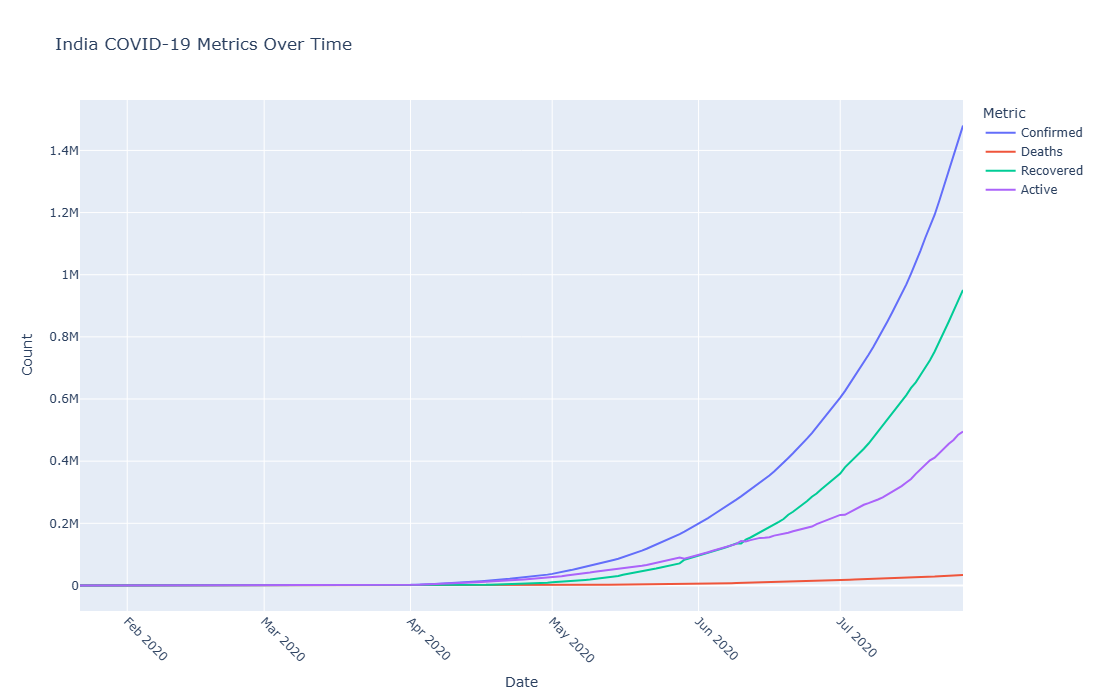

In [57]:
fig_india_line = px.line(
    india_data,
    x='Date',
    y=['Confirmed', 'Deaths', 'Recovered', 'Active'],
    labels={'value': 'Count', 'Date': 'Date', 'variable': 'Metric'},
    title='India COVID-19 Metrics Over Time'
)

# Customize the layout
fig_india_line.update_layout(
    xaxis_title='Date',
    yaxis_title='Count',
    legend_title='Metric',
    xaxis_tickangle=45,
    width=1000,  
    height=700,
)

fig_india_line.show()


### Using facebook libraries to forecast

In [58]:
pip install prophet plotly

Note: you may need to restart the kernel to use updated packages.


In [59]:
from prophet import Prophet

In [60]:
import plotly.express as px

15:42:57 - cmdstanpy - INFO - Chain [1] start processing
15:42:57 - cmdstanpy - INFO - Chain [1] done processing


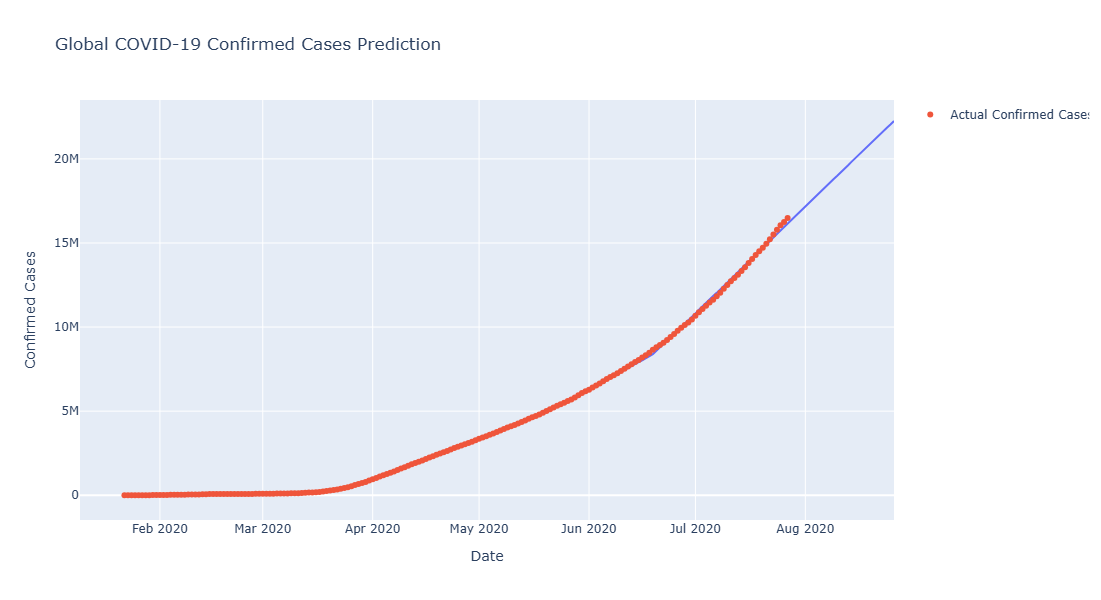

In [61]:
# getting confirmed cases data
global_prophet_data = global_data[['Date', 'Confirmed']].rename(columns={'Date': 'ds', 'Confirmed': 'y'})
global_prophet_data['ds'] = pd.to_datetime(global_prophet_data['ds'])

# Initialize the Prophet model
model_global = Prophet()

# Fitting the model on the data
model_global.fit(global_prophet_data)

# Creating a dataframe with future dates (forecast for 30 days ahead)
future_global = model_global.make_future_dataframe(periods=30) 

# Making predictions
forecast_global = model_global.predict(future_global)

fig_global_prophet = px.line(forecast_global, x='ds', y='yhat', title="Global COVID-19 Confirmed Cases Prediction", 
                             labels={'ds': 'Date', 'yhat': 'Predicted Confirmed Cases'})
fig_global_prophet.add_scatter(x=global_prophet_data['ds'], y=global_prophet_data['y'], mode='markers', 
                               name='Actual Confirmed Cases')

fig_global_prophet.update_layout(
    height=600, 
    title="Global COVID-19 Confirmed Cases Prediction",
    xaxis_title="Date",
    yaxis_title="Confirmed Cases"
)

fig_global_prophet.show()

15:42:58 - cmdstanpy - INFO - Chain [1] start processing
15:42:58 - cmdstanpy - INFO - Chain [1] done processing


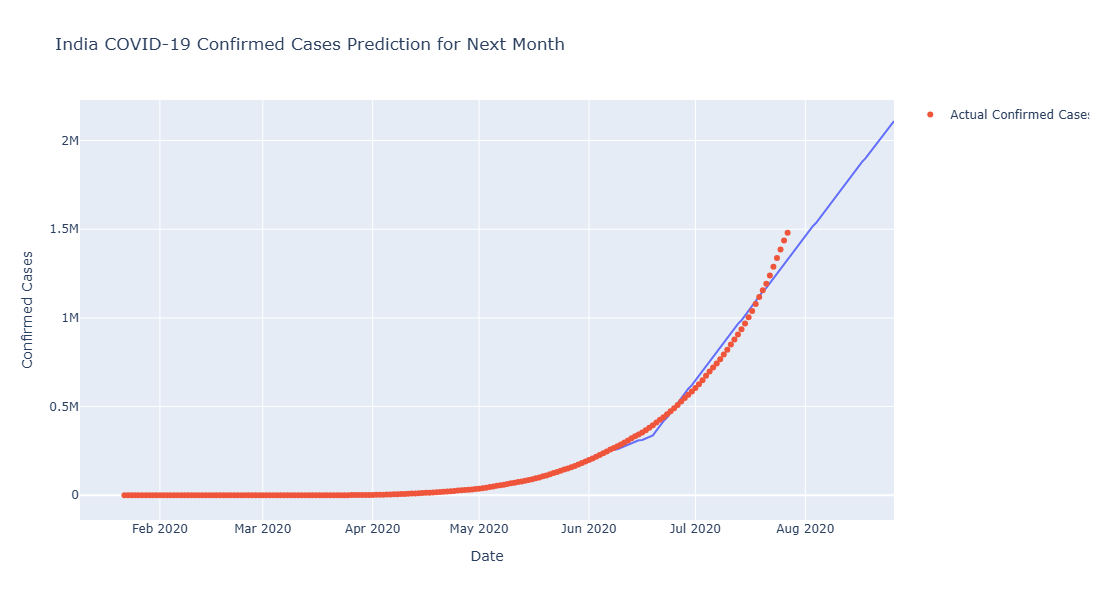

In [62]:
# Prepare the data for Prophet (e.g., Confirmed cases)
india_prophet_data = india_data[['Date', 'Confirmed']].rename(columns={'Date': 'ds', 'Confirmed': 'y'})
india_prophet_data['ds'] = pd.to_datetime(india_prophet_data['ds'])

# Initializing the Prophet model for India
model_india = Prophet()

# Fitting the model on the data
model_india.fit(india_prophet_data)

# Create a dataframe with future dates (forecast for 30 days ahead)
future_india = model_india.make_future_dataframe(periods=30)

# Making predictions
forecast_india = model_india.predict(future_india)

# Visualizing the forecast with Plotly
fig_india_prophet = px.line(forecast_india, x='ds', y='yhat', title="India COVID-19 Confirmed Cases Prediction for Next Month", 
                            labels={'ds': 'Date', 'yhat': 'Predicted Confirmed Cases'})

fig_india_prophet.add_scatter(x=india_prophet_data['ds'], y=india_prophet_data['y'], mode='markers', 
                              name='Actual Confirmed Cases')

fig_india_prophet.update_layout(
    height=600,  
    title="India COVID-19 Confirmed Cases Prediction for Next Month",
    xaxis_title="Date",
    yaxis_title="Confirmed Cases"
)

fig_india_prophet.show()